For this assignment, you will analyse a dataset and apply several machine learning algorithm to it.
You are encouraged to select an interesting dataset yourself, e.g. from the field in which you study.
Alternatively, you can make use of a dataset provided by us. If you choose to utilize a specific
dataset, you should make sure it meets the following criteria:
– At least 1000 items (data points)
– At least 10 features (columns, excluding identifiers etc.), a mix of continuous and discrete
variables
– There should be a clear prediction (regression) task present.
– The dataset is publically accessible (no proprietary data)
In this case, you should send an email with a link to your dataset to the TA-mailbox so we can
verify whether the dataset is appropriate for the assignment.
In the remaining part of this section please add your description of the data set you use and the
learning tasks you will tackle in the next sections. You could look at what variables are present in
the data set, how they are distributed, what type of variables they are. Apply some pre-processing
2 Short Author Names / Group Number
if this is needed to make the data usable1
. You could make us

This code loads and describes the dataset

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
# Load CSV dataset
df=pd.read_csv("/content/HousePriceDataset (1).csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

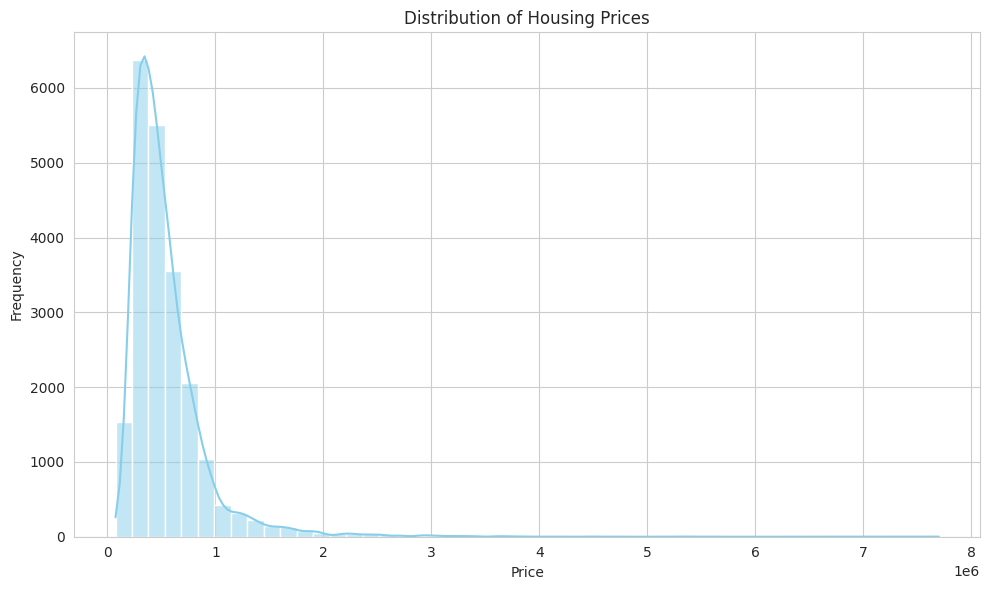

In [33]:
sns.set_style("whitegrid")

# Creating the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')

# Setting the title and labels
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()

# Display the plot
plt.show()